# EDA-2. Описательная статистика. Меры центральной тенденции в Python

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport

In [2]:
# Задание 2.1
# Наименьший балл за вино в дата-сете
data=pd.read_csv('data/wine_cleared.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.9+ MB


In [3]:
profile=ProfileReport(data, title="PD Profile Rep")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
profile.to_file("my_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
import statistics

## Задание 2.3 

In [6]:
# вычислить среднюю стоимость бутылки вина через mean с помощью библиотеки statistics. Округлить до сотых
average=statistics.mean(data['price'])
print(round(average, 2))

35.36


## Задание 2.4

In [7]:
# вычислить среднюю стоимость бутылки вина через стандартные ф-ии python
import numpy as np
average_pytho=data['price'].mean()
print(average_pytho)
# Эталонный ответ )
mean = sum(data['price']) / len(data['price'])
print(mean)

35.363389129985535
35.36338912999136


## Задание 2.4

In [8]:
# вычислить медиану стоимости бутылки вина через median с помощью библиотеки statistics. Округлить до сотых
median=statistics.median(data['price'])
print(round(median, 2))

28.0


## Задание 2.5

In [9]:
# вычислить медиану стоимости бутылку вина через ф-ии python
median_pytho=data['price'].median()
print(median_pytho)
# Эталонный ответ )
count_price = len(data['price']) # количество записей цен
sorted_price = sorted(data['price']) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = round(0.5 * count_price)
    median_ = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

28.0


28.0

- Также в библиотеке statistics есть функции, связанные с медианой, — функция statistics.median_low() и функция statistics.median_high().

## Задание 2.7

In [10]:
# вычислить моду стоимости бытылки вина при помощи mode с помощью библиотеки statistics. Округлить до сотых
moda=statistics.mode(data['price'])
print(round(moda, 2))

35.36


## Задание 2.8

In [11]:
# вычислить моду стоимости бытылки вина при помощи ф-ии python
moda_pytho=data['price'].mode()
print(moda_pytho)
# Эталонный ответ )
mode = round(data["price"].value_counts().index[0],2)
print(moda)

0    35.363389
Name: price, dtype: float64
35.363389129985535


## Задание 3.3

In [12]:
# Для расчёта коэффцициента корреляции применяем фун-ию df.corr() из библы pandas
# Вычислите коэффициент корреляции между переменными в датасете винных обзоров. В ответ запишите величину коэффициента корреляции между ценой за бутылку и баллами за вино. 
# Округлите ответ до шести знаков после запятой
data=pd.read_csv('data/wine_cleared.csv')
corr=data.corr(numeric_only=True)
print(round(corr, 6))

            Unnamed: 0    points     price
Unnamed: 0    1.000000  0.007124  0.004652
points        0.007124  1.000000  0.402137
price         0.004652  0.402137  1.000000


## Задание 3.4

In [13]:
# Оцените характер связи на основании рассчитанного коэффициента корреляции между ценой и баллом вина при расчёте методом df.corr()
# из ответа в 3.3 (0,4) видим что связь прямая

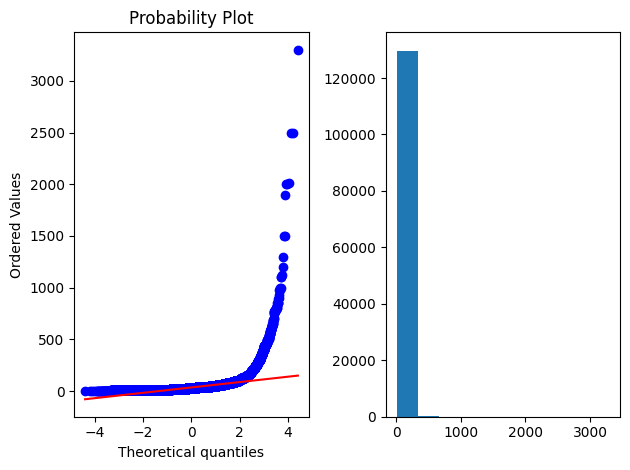

In [14]:
# строим графики распределения

import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов
%matplotlib inline

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

## Задание 4.2

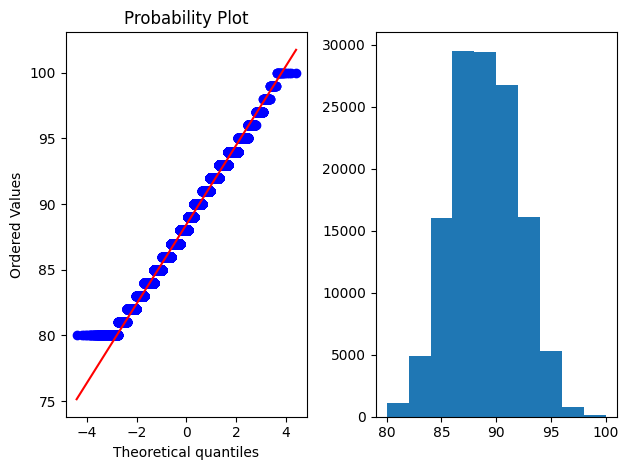

In [15]:
# Постройте приведённые выше графики для признака points из датасета винных обзоров и выберите верное утверждение
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

## Задание 5.1

In [16]:
# Рассчитайте коэффициент корреляции Спирмена для признаков point и price. Ответ округлите до сотых.
corr_spearman=data.corr(method='spearman', numeric_only=True)
print(round(corr_spearman, 2))

            Unnamed: 0  points  price
Unnamed: 0        1.00    0.01   0.00
points            0.01    1.00   0.58
price             0.00    0.58   1.00


## Задание 5.2

In [17]:
# Рассчитайте коэффициент корреляции Кендалла для признаков point и price. Ответ округлите до сотых
corr_kend=data.corr(method='kendall', numeric_only=True)
print(round(corr_kend, 2))

            Unnamed: 0  points  price
Unnamed: 0        1.00    0.01   0.00
points            0.01    1.00   0.43
price             0.00    0.43   1.00


## Задание 5.3

In [18]:
# Метод Мэтьюса
from sklearn.metrics import matthews_corrcoef
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

## Задание 6.1

### Набор данных содержит ~600 записей о девушках и восемь признаков:

- BMI — индекс массы тела (ИМТ)
- year — год размещения модели в журнале
- month — месяц размещения
- waist — обхват талии модели
- hips — обхват бёдер модели
- height — рост модели
- weight — вес модели
- waist/hip — соотношение обхвата талии и бёдер

In [19]:
data_girl=pd.read_csv('data/model.csv')
data_girl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      662 non-null    object 
 1   Year       662 non-null    int64  
 2   Waist      662 non-null    float64
 3   Hips       662 non-null    float64
 4   Height     662 non-null    float64
 5   Weight     662 non-null    float64
 6   BMI        662 non-null    float64
 7   Waist/Hip  662 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 41.5+ KB


In [20]:
# Постройте матрицу корреляций для датасета. В ответ впишите самый высокий коэффициент корреляции. Ответ округлите до сотых.
coef=data_girl.corr(numeric_only=True)
print(round(coef,2))

           Year  Waist  Hips  Height  Weight   BMI  Waist/Hip
Year       1.00   0.29 -0.28    0.28   -0.01  0.03       0.46
Waist      0.29   1.00  0.28    0.37    0.45  0.14       0.74
Hips      -0.28   0.28  1.00    0.23    0.54  0.21      -0.42
Height     0.28   0.37  0.23    1.00    0.71 -0.04       0.20
Weight    -0.01   0.45  0.54    0.71    1.00  0.21       0.07
BMI        0.03   0.14  0.21   -0.04    0.21  1.00      -0.01
Waist/Hip  0.46   0.74 -0.42    0.20    0.07 -0.01       1.00


## Тепловая матрица корреляций

<Axes: >

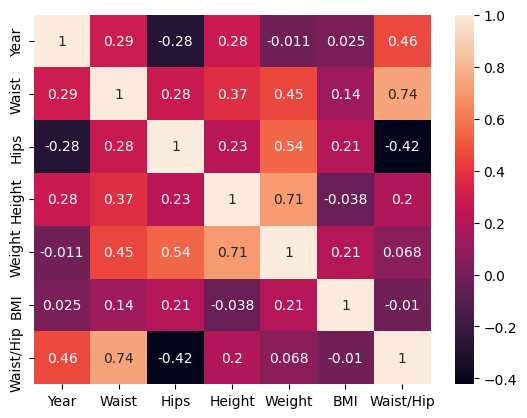

In [21]:
import seaborn as sns
sns.heatmap(data_girl.corr(numeric_only=True), annot=True)

## SCATTERPLOT

<Axes: xlabel='Waist/Hip', ylabel='Waist'>

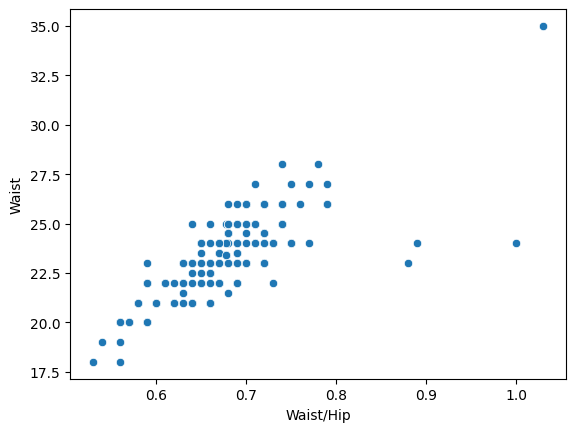

In [22]:
sns.scatterplot(data=data_girl, x='Waist/Hip', y='Waist')

<Axes: xlabel='Weight', ylabel='Year'>

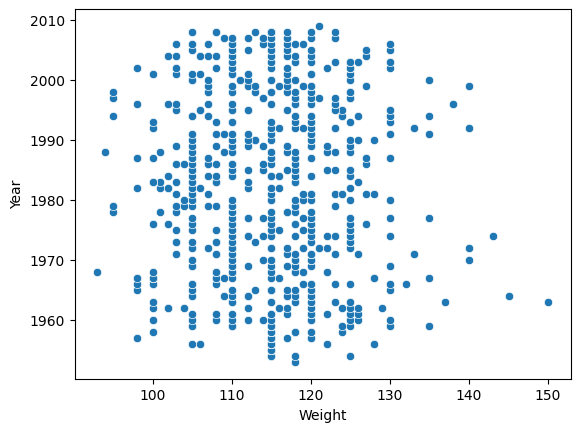

In [23]:
sns.scatterplot(data=data_girl, x="Weight", y="Year")

- Сравнив эти два графика, мы можем сказать, что в первой паре признаков связь видна более отчётливо, точки больше прижаты друг к другу и выстроены визуально в линию. Эта линия похожа на рассматриваемую нами в прошлом юните линейную связь. Во второй паре признаков они распределены по всему пространству — трудно выявить основную массу признаков, связь кажется очень слабой.

## График попарных отношений PAIRPLOT

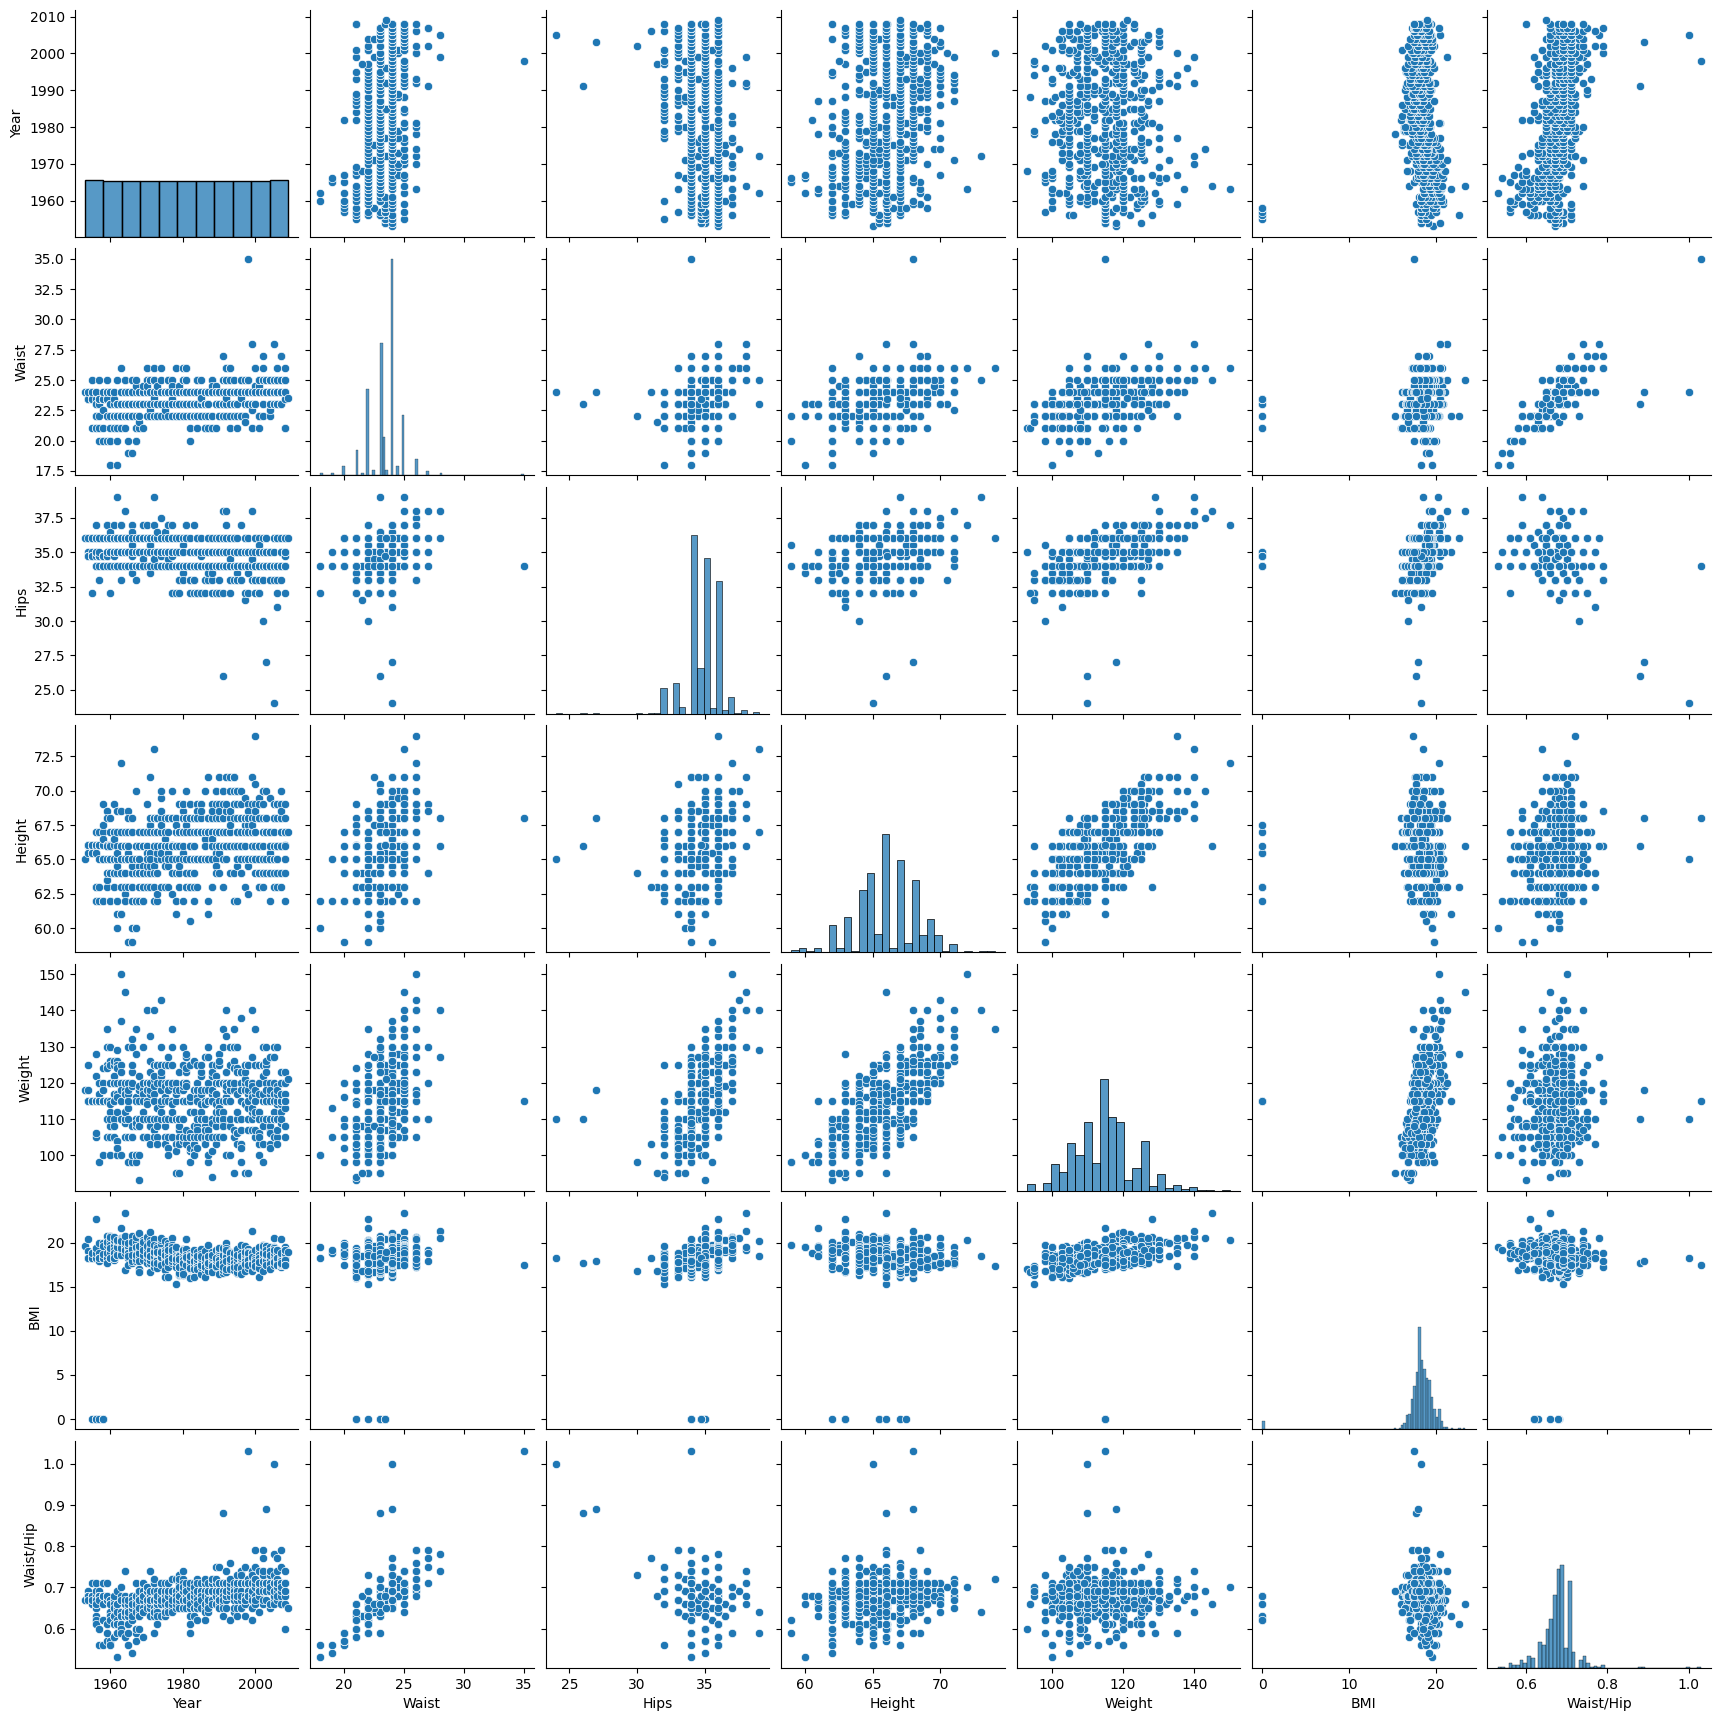

In [24]:
sns.pairplot(data_girl)

## Задание 6.3

In [25]:
# Посчитайте коэффициент корреляции между признаками Weight (вес модели) и Height (рост модели). Ответ округлите до сотых.
coef=data_girl.corr(numeric_only=True)
print(round(coef,2))

           Year  Waist  Hips  Height  Weight   BMI  Waist/Hip
Year       1.00   0.29 -0.28    0.28   -0.01  0.03       0.46
Waist      0.29   1.00  0.28    0.37    0.45  0.14       0.74
Hips      -0.28   0.28  1.00    0.23    0.54  0.21      -0.42
Height     0.28   0.37  0.23    1.00    0.71 -0.04       0.20
Weight    -0.01   0.45  0.54    0.71    1.00  0.21       0.07
BMI        0.03   0.14  0.21   -0.04    0.21  1.00      -0.01
Waist/Hip  0.46   0.74 -0.42    0.20    0.07 -0.01       1.00


## Задание 7.2

In [26]:
# Рассчитайте среднее значение признаков при помощи библиотеки statistics для признаков weight и height. Ответ округлите до сотых.
for_weight=statistics.mean(data_girl['Weight'])
print(round(for_weight, 2))
for_height=statistics.mean(data_girl['Height'])
print(round(for_height, 2))

114.94
66.06


## Задание 7.3

In [27]:
# Постройте матрицы визуализации корреляций, диаграммы рассеивания, проанализируйте и выполните задание.